In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/nipace/Documents/semo/ml/ml-assignment-8/MLPB/Problems/Classify Iris Species/_Data/train.csv')
test = pd.read_csv('/Users/nipace/Documents/semo/ml/ml-assignment-8/MLPB/Problems/Classify Iris Species/_Data/test.csv')


In [3]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.2,3.5,1.5,0.2,setosa
1,5.1,3.7,1.5,0.4,setosa
2,6.7,3.3,5.7,2.1,virginica
3,5.1,3.8,1.5,0.3,setosa
4,5.6,2.5,3.9,1.1,versicolor


In [4]:
df = pd.concat([train, test], ignore_index=True) #Combine train and test data for clustering analysis

In [5]:
print(df.head())


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0           5.2          3.5           1.5          0.2      setosa
1           5.1          3.7           1.5          0.4      setosa
2           6.7          3.3           5.7          2.1   virginica
3           5.1          3.8           1.5          0.3      setosa
4           5.6          2.5           3.9          1.1  versicolor


In [6]:
numeric_features = df.select_dtypes(include=[np.number]).columns
df_scaled = StandardScaler().fit_transform(df[numeric_features])

In [10]:
# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

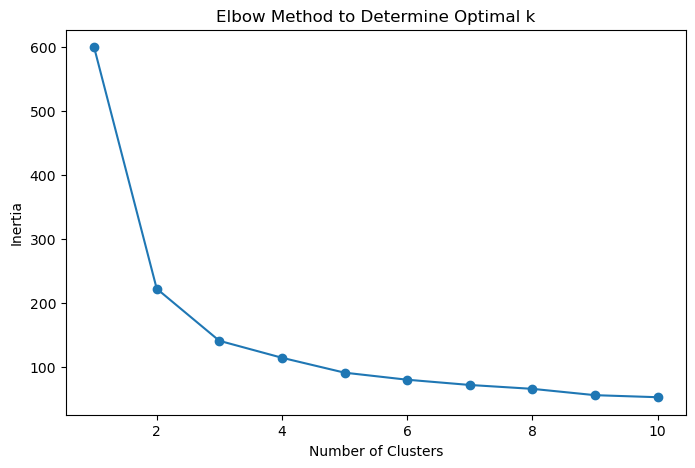

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [12]:
# Choosing k = 3 based on the elbow plot as after 3 the decrease in inertia becomes less pronounced
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

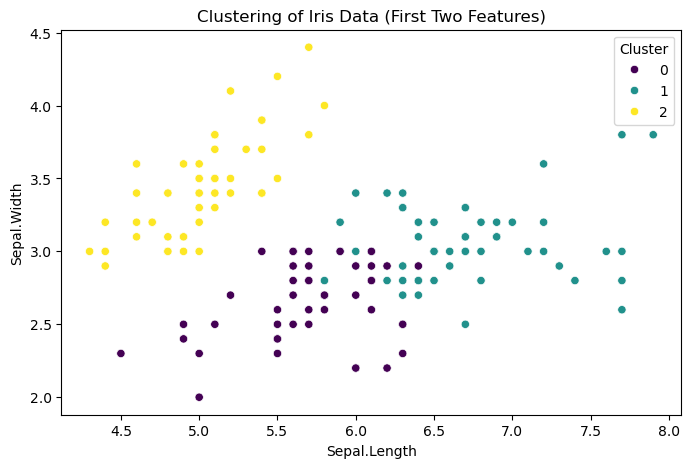

In [13]:
# Visualize the clusters 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[numeric_features[0]], y=df[numeric_features[1]], hue=df['Cluster'], palette='viridis')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])
plt.title('Clustering of Iris Data (First Two Features)')
plt.show()

In [17]:
# Analyze the clusters
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

print("\nCluster Counts:")
print(df['Cluster'].value_counts())


# Select only numeric columns for calculating the mean
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nMean feature values per cluster:")
print(df.groupby('Cluster')[numeric_columns].mean())


Cluster Centroids:
[[-0.16840578 -0.9726981   0.2598706   0.17543327]
 [ 1.03359865  0.00613858  0.94360463  0.9725624 ]
 [-1.00206653  0.90625492 -1.30310821 -1.25634413]]

Cluster Counts:
Cluster
1    55
2    49
0    46
Name: count, dtype: int64

Mean feature values per cluster:
         Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Cluster
Cluster                                                               
0            5.704348     2.634783      4.215217     1.332609      0.0
1            6.696364     3.060000      5.418182     1.938182      1.0
2            5.016327     3.451020      1.465306     0.244898      2.0
